In [16]:
import pandas as pd

In [17]:
covid_sp = pd.read_csv('covid/data/dados_covid_sp.csv', sep=';')

In [18]:
covid_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [19]:
covid_sp['datahora'] = pd.to_datetime(covid_sp['datahora'], format='%Y-%m-%d')

In [20]:
covid_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777784 entries, 0 to 777783
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     777784 non-null  object        
 1   codigo_ibge    777784 non-null  int64         
 2   dia            777784 non-null  int64         
 3   mes            777784 non-null  int64         
 4   datahora       777784 non-null  datetime64[ns]
 5   casos          777784 non-null  int64         
 6   casos_novos    777784 non-null  int64         
 7   casos_pc       777784 non-null  object        
 8   casos_mm7d     777784 non-null  object        
 9   obitos         777784 non-null  int64         
 10  obitos_novos   777784 non-null  int64         
 11  obitos_pc      777784 non-null  object        
 12  obitos_mm7d    777784 non-null  object        
 13  letalidade     777784 non-null  object        
 14  nome_ra        776580 non-null  object        
 15  

In [21]:
covid_sp.describe()

,codigo_ibge,dia,mes,datahora,casos,casos_novos,obitos,obitos_novos,cod_ra,cod_drs,pop,pop_60,area,map_leg_s,semana_epidem
count,7.777840e+05,777784.000000,777784.000000,777784,7.777840e+05,777784.000000,777784.000000,777784.000000,777784.000000,777784.000000,7.777840e+05,7.777840e+05,777784.000000,776580.000000,777784.000000
mean,3.538715e+06,15.684385,6.308970,2021-10-18 12:00:00.000000256,5.826116e+03,8.515248,179.462659,0.231955,8.470588,9.140867,6.910201e+04,1.057539e+04,34178.256966,3.441982,25.763289
min,3.500105e+06,1.000000,1.000000,2020-02-25 00:00:00,-1.000000e+00,-3064.000000,0.000000,-81.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000
25%,3.514601e+06,8.000000,3.000000,2020-12-21 18:00:00,2.350000e+02,0.000000,6.000000,0.000000,4.000000,5.000000,5.530000e+03,9.260000e+02,13391.000000,2.000000,13.000000
50%,3.528754e+06,16.000000,6.000000,2021-10-18 12:00:00,9.360000e+02,0.000000,23.000000,0.000000,8.000000,9.000000,1.328300e+04,2.193000e+03,24806.500000,3.000000,24.000000
75%,3.543238e+06,23.000000,9.000000,2022-08-15 06:00:00,3.486000e+03,2.000000,84.000000,0.000000,13.000000,14.000000,4.107300e+04,6.377000e+03,45444.000000,5.000000,38.250000
max,9.999999e+06,31.000000,12.000000,2023-06-12 00:00:00,1.179717e+06,8646.000000,44991.000000,378.000000,16.000000,17.000000,1.186966e+07,1.853286e+06,182626.000000,8.000000,53.000000
std,2.549588e+05,8.823961,3.375095,NaN,3.604389e+04,68.594567,1390.921946,2.758550,4.571577,4.985459,4.794512e+05,7.465416e+04,31348.555189,2.140958,14.784495


In [24]:
# casos de campinas:
covid_campinas = covid_sp[covid_sp['nome_munic'] == "Campinas"]
minimo = min(covid_campinas['obitos_novos'])
maximo = max(covid_campinas['obitos_novos'])
f'minimo: {minimo}, maximo: {maximo}'

'minimo: 0, maximo: 67'

In [45]:
covid_campinas['casos_novos'].quantile([0, .25, .5, .75, 1])

0.00       0.00
0.25      15.75
0.50     107.00
0.75     298.25
1.00    2101.00
Name: casos_novos, dtype: float64

In [36]:
# amplitude interquartil:
q1 = covid_campinas['casos_novos'].quantile(0.25)
q3 = covid_campinas['casos_novos'].quantile(0.75)
IQR = q3 - q1
IQR

np.float64(282.5)

In [37]:
import seaborn as sns

<Axes: xlabel='casos_novos', ylabel='Count'>

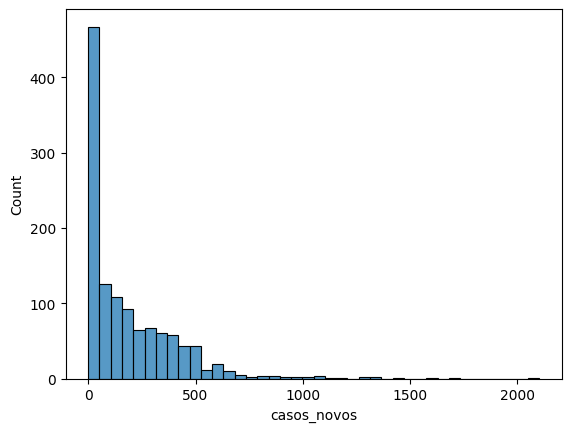

In [41]:
sns.histplot(covid_campinas['casos_novos'])

In [44]:
pd.DataFrame(covid_campinas['casos_novos'].describe())

,casos_novos
count,1204.000000
mean,186.389535
std,228.579764
min,0.000000
25%,15.750000
50%,107.000000
75%,298.250000
max,2101.000000


<Axes: xlabel='casos_novos'>

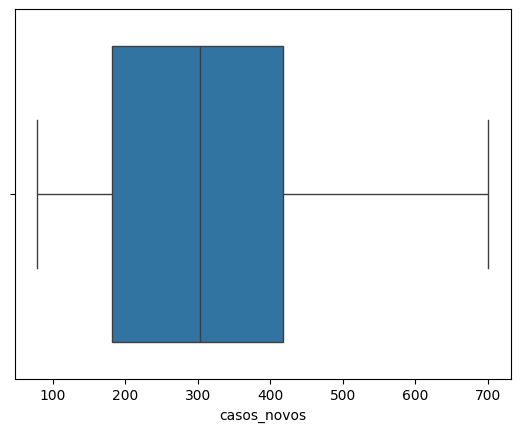

In [57]:
query = covid_campinas['datahora'].between('2020-07-01','2020-07-31')
covid_julho_campinas = covid_campinas[query]
sns.boxplot(covid_julho_campinas, x='casos_novos')

In [55]:
covid_julho_campinas['casos_novos'].quantile([0,.25,.5,.75,1])

0.00     79.0
0.25    181.5
0.50    303.0
0.75    418.0
1.00    701.0
Name: casos_novos, dtype: float64

<Axes: xlabel='casos_novos'>

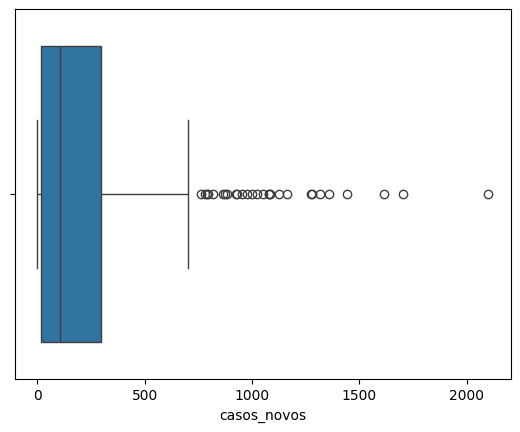

In [58]:
sns.boxplot(covid_campinas, x='casos_novos')

<Axes: xlabel='casos_novos'>

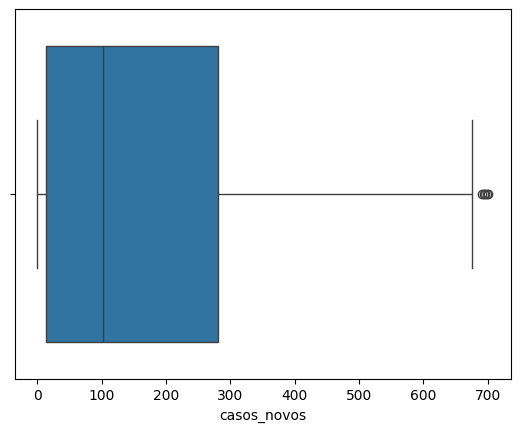

In [82]:
# amplitude interquartil:
q1 = covid_campinas['casos_novos'].quantile(0.25)
q3 = covid_campinas['casos_novos'].quantile(0.75)
iqr = q3 - q1

# Limites para outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# retirando outliers
covid_campinas_sem_outliers = covid_campinas[(covid_campinas['casos_novos'] < upper_bound)]
sns.boxplot(data=covid_campinas_sem_outliers, x='casos_novos')


In [84]:
# desvio populacional > soma das diferenças com relação a média.
covid_campinas['casos_novos'].var()

np.float64(52248.70848556903)

In [87]:
# Return sample standard deviation over requested axis.
covid_campinas['casos_novos'].std()

np.float64(228.5797639459124)